In [1]:
import sys
sys.path.append('..')

In [2]:
import pandas as pd
import seaborn as sns
from core.tools import *

In [3]:
df = pd.read_csv('data/crypto_1m.csv', index_col='unix')
df = df[-60*24*2:-60*24*1] # pick highest cointegrated pairs from t-24 hours

<AxesSubplot:>

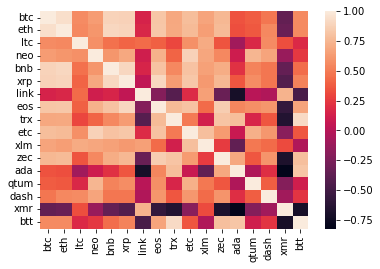

In [4]:
corr = df.corr()
sns.heatmap(corr)

In [5]:
n = corr.shape[0]
total_pairs = n**2 - n
total_pairs

272

In [6]:
def get_top_n_corr(corr, n):
    return corr.unstack().sort_values(ascending=False)[corr.shape[0]:corr.shape[0]+n*2][::2]
top_corr = get_top_n_corr(corr, 100)
top_corr

btc   eth     0.939586
btt   trx     0.920895
eth   bnb     0.905407
xrp   eos     0.902367
bnb   xrp     0.900645
                ...   
btt   neo     0.244836
dash  btt     0.229084
ada   bnb     0.214780
      dash    0.200730
etc   link    0.185636
Length: 100, dtype: float64

In [7]:
p_values = []
for i, j in list(top_corr.axes[0]):
    pair = i + ' ' + j
    b1, b0, adf_p = fit_model(df[i], df[j])
    p_values.append({'pair':pair, 'p_value':adf_p})

In [8]:
pd.DataFrame(p_values).sort_values(by='p_value')

,pair,p_value
8,etc neo,0.000241
1,btt trx,0.000527
9,zec eos,0.008250
37,xlm neo,0.008621
2,eth bnb,0.009453
...,...,...
44,xrp trx,0.967562
33,eth trx,0.973261
93,ltc trx,0.975945
90,eth ada,0.992485


In [9]:
# Note: Orders matter slightly !
b1, b0, adf_p = fit_model(df['neo'], df['etc'])
print(adf_p)

0.0022241656477388965
